#Analyse reproductible en Python Exercice 3 - Séance 1
Author : Philippe Tu BDTN - Promotion 2019
Creation Date: 11 / 03 / 2018
Steps in this notebook : 
1. Load txt file & Data cleaning
2. Calculating words occurences
3. Display & analysis of the distribution

Step 1 : Load file & Data Cleaning.
 Let's start by opening the text file. The initial file has a lot of empty lines, so we use error_bad_lines=False.
The initial txt file also has special characters, we'll open it with utf-8 encoding.

In [1]:
%%capture
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from collections import Counter
data = pd.read_csv('lesmiserables01hugogoog_djvu.txt',header=None,error_bad_lines=False,encoding ='utf-8') 
data.columns=["ligne"];

Let's take a look at the first and last lines.

In [2]:
data

,ligne
0,Google
1,This is a digital copy of a book thaï was prcs...
2,to make the world's bocks discoverablc online.
3,It has survived long enough for the copyright ...
4,to copyright or whose légal copyright term has...
5,publisher to a library and finally to you.
6,Usage guidelines
7,Google is proud to partner with libraries to d...
8,We also ask that you:
9,+ Refrain fivm automated querying Do nol send ...


It looks like 21 lines aren't useful for the analysis. Let's take out those lines.

In [3]:
data.drop(data.index[:21],inplace=True)
data = data.reset_index(drop=True)
data

,ligne
0,LES
1,MISÉRABLES
2,TOME DEUXIÈME
3,EDITEURS
4,le
5,A BRUXELIES
6,VICTOR HUGO
7,•V
8,LES
9,MISÉRABLES


Row 3761 to last line aren't in the book, lets take them out too.

In [4]:
data.tail(70)

,ligne
3755,370 LES MISBKABLBS.
3756,perd les pauvres. Heureusement Dieu sait oii re-
3757,trouver rame. On coucha Fantine dans les ténèb...
3758,parmi les premiers os venus ; elle subit la pr...
3759,des cendres. Elle fut jetée à la fosse publiqu...
3760,tombe ressembla à son lit.
3761,FIN DD TOMB DEUXIEME
3762,ET 1)£ LA PBFtflkBE PABTIB
3763,TABLE
3764,TABLE


We have to delete the last 64 lines of the dataframe.

In [5]:
data.drop(data.tail(64).index,inplace=True)
data = data.reset_index(drop=True)
data.tail(30)

,ligne
3731,La sœur répondit : — Non.
3732,dévoue.
3733,profondément.
3734,sainte fille! vous n'êtes plus de ce monde de-
3735,puis beaucoup d'années; vous avez rejoint dans...
3736,lumière vos sœurs les vierges et vos frères les
3737,anges ; que ce mensonge vous soit compté dans le
3738,paradis !
3739,L'affirmation de la sœur fut pour Javert quelque
3740,chose de si décisif qu'il ne remarqua même pas...


Step 2 : Calculating words occurences
Lets concatenate every row into a single string first, then count the frequency of each word.

In [6]:
stringWholeText=''.join(data.ligne)
stringWholeText=stringWholeText.replace("- ","") #Removing bonds in the text
stringWholeText = re.sub(r'[^\w\s]','',stringWholeText) #Removing punctuation using regex
print(stringWholeText[0:200])

LES MISÉRABLES TOME DEUXIÈME EDITEURS le A BRUXELIES VICTOR HUGO V LES MISÉRABLES PREMIÈRE PARTIE FANTINE II PARIS BRU XELL ES M DCCC LXIII Tous droits de reproduction et de traduction rùservés LIVRE 


Now we have a single string that contains the whole "Les misérables" text

In [13]:
wordlist = stringWholeText.split() # We put the different words in a list using split function
wordlist = [item.lower() for item in wordlist] # Lower case every word of the list wordlist
wordFrequency=[]
for word in wordlist: #Counting and putting the result for each word existing in the text in a list called wordFrequency
    wordFrequency.append(wordlist.count(word))

In [14]:
#Now lets put the words and their frequencies into a single dictionary
wordsAndFrequencies = dict(zip(wordlist,wordFrequency))
wordsAndFrequencies
sample={k: wordsAndFrequencies[k] for k in list(wordsAndFrequencies)[:20]}
sample

{'a': 176,
 'bru': 1,
 'bruxelies': 1,
 'deuxième': 2,
 'editeurs': 1,
 'es': 3,
 'fantine': 98,
 'hugo': 1,
 'ii': 31,
 'le': 780,
 'les': 532,
 'm': 207,
 'misérables': 81,
 'paris': 25,
 'partie': 4,
 'première': 26,
 'tome': 1,
 'v': 3,
 'victor': 1,
 'xell': 1}

We also have to get rid of numbers in keys and their frequency, it can pollute our final plots.

In [15]:
def hasNumbers(string): #This function returns True if a string contains a digit.
    return any(index.isdigit() for index in string)
# Now we delete the key;value couples that has digits as a key.
wordsAndFrequencies={k: v 
                     for k, v in wordsAndFrequencies.items() 
                         if hasNumbers(k) is False}

In [16]:
#Now let's put the result into a dataframe and plot it
#dataFrameResult=pd.Series(wordsAndFrequencies, name='Words Frenquencies')
dataFrameResult = pd.Series(wordsAndFrequencies, name='frequency') 
dataFrameResult.reset_index()

,index,frequency
0,_,1
1,a,176
2,abaissé,1
3,abandonné,2
4,abattu,1
5,abject,1
6,ablbs,1
7,abominable,3
8,abondaient,1
9,abondèrent,1


Step 3 : Display & analysis of the distribution

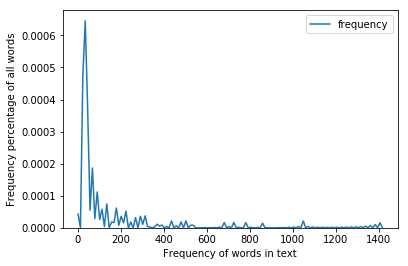

In [19]:
# The dataframe has no words with digits, looks good, now let's plot.
%matplotlib inline
plot = sns.kdeplot(dataFrameResult)
plot.set(xlabel='Frequency of words in text',ylabel="Frequency percentage of all words")
plt.show()

Analysis : A lot of words has a little frequencies in this text (between 1 and 150-170), they are likely to be complicated words, words that are not often used in oral. Words that has a frequency between 200-400 would be verbs for instance.
Finally, there are words that are found more than 500 times (600+ times, 800, 800, 1300, 1400). They are likely to be pronouns, subjects, articles.
This survey confirms the richness of French as a lot of words has some correct frenquency in "Les Misérables" (around 100-200). We would likely find more words around 200-500 times on a text in English.